In [1]:
import pandas as pd
import os
from dbfread import DBF
import numpy as np

import math

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

In [2]:
#Importo los datos

data_general = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_100_DISCAPACIDAD.dbf', load=True, encoding='latin-1'))
data_discapacidad = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_200_DISCAPACIDAD.dbf', load=True, encoding='latin-1'))
data_vivienda = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_300_HOGAR Y VIVIENDA.dbf', load=True, encoding='latin-1'))
data_educacion = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_500_EDUCACION.dbf', load=True, encoding='latin-1'))
data_salud = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_600_SALUD.dbf', load=True, encoding='latin-1'))
data_empleo1 = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_700_EMPLEO_1.dbf', load=True, encoding='latin-1'))
data_empleo2 = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_700_EMPLEO_2.dbf', load=True, encoding='latin-1'))
data_accesibilidad = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_800_ACCESIBILIDAD.dbf', load=True, encoding='latin-1'))
data_integracion = pd.DataFrame(DBF(r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL\Data\CAP_900_INTEGRACION.dbf', load=True, encoding='latin-1'))

In [3]:
data_empleo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37524 entries, 0 to 37523
Columns: 238 entries, NOMBREDD to AREA
dtypes: float64(172), int64(17), object(49)
memory usage: 68.1+ MB


In [4]:
nombre_general = {
    'NOMBREDD':'departamento', 
    'P01':'codigodepar', 
    'P06':'conglomerado', 
    'P11':'nºvivienda', 
    'P14':'nºhogar', 
    'P13':'cuantoshogares', 
    'P101':'orden', 
    'P103':'parentesco', 
    'P104':'esmiembro',
    'P105':'sexo',
    'P106':'edad', 
    'P106_1':'meses', 
    'P107':'dni', 
    'P108':'estadocivil', 
    'P109_1':'estudio', 
    'REG_NAT':'region', 
    'AREA':'area', 
    'FACTOR_PCD':'factorpoblacion', 
    'METROP': 'metrop'
}
'codigodepar','nºvivienda','factorpoblacion', 'metrop','cuantoshogares','nºhogar','esmiembro'




('codigodepar',
 'nºvivienda',
 'factorpoblacion',
 'metrop',
 'cuantoshogares',
 'nºhogar',
 'esmiembro')

In [5]:
# inplace, indica que deseas modificar el DataFrame original en lugar de crear una copia

data_general.rename(columns=nombre_general,inplace=True)
data_discapacidad.rename(columns=nombre_general,inplace=True)
data_vivienda.rename(columns=nombre_general,inplace=True)
data_educacion.rename(columns=nombre_general,inplace=True)
data_salud.rename(columns=nombre_general,inplace=True)
data_empleo1.rename(columns=nombre_general,inplace=True)
data_empleo2.rename(columns=nombre_general,inplace=True)
data_accesibilidad.rename(columns=nombre_general,inplace=True)
data_integracion.rename(columns=nombre_general,inplace=True)

In [6]:
nombre_discapacidad = {
    'P203':'movilidad',
    'P204':'vision',
    'P205':'comunicacion',
    'P206':'audicion',
    'P207':'cognitivo',
    'P208':'social',
    'P209':'cronico'
}

data_discapacidad.rename(columns=nombre_discapacidad,inplace=True)

In [7]:
nombre_accesibilidad = {
    'P802_01':'salud',
    'P802_02':'educativo',
    'P802_04':'farmacia',
    'P802_05':'spub',
    'P802_11':'mercado',
    'P802_12':'super',
    'P805_01':'rampa',
    'P805_04':'calledespejada',
    'P806_01':'transportepublicod',
    'P806_09':'aereo',
    'P808':'estadovias'    
}

data_accesibilidad.rename(columns=nombre_accesibilidad,inplace=True)

In [8]:
nombre_accesibilidad1 = {
    'P802_01':'salud',
    'P802_02':'educativo',
    'P802_04':'farmacia',
    'P802_05':'spub',
    'P802_11':'mercado',
    'P802_12':'super',
    'P806_01':'transportepublicod',
    'P806_09':'aereo',
    'P808':'estadovias'    
}

data_integracion.rename(columns=nombre_accesibilidad1,inplace=True)

In [9]:
nombre_educacion = {
    'P501':'lee', 
    'P502':'asisteestablecimiento', 
    'P509':'xqno', 
    'P521':'dni',
    'P523':'etnia' 
}
data_educacion.rename(columns=nombre_educacion,inplace=True)

In [10]:
nombre_salud = {
    'P601_3':'sintonmacronico',
    'P601_4':'accidente',
    'P621':'hijos',
    'P619':'segurodesalud',
    'P606':'presenciasintomadisc'
}
data_salud.rename(columns=nombre_salud,inplace=True)

In [11]:
nombre_integracion = {
    'P901':'tratodist',
    'P905':'relacionsentimentalpas',
    'P911':'voto',
    'P921_2':'impdesarrollopersonal',
    'P921_3':'valoracosas'
}
data_integracion.rename(columns=nombre_integracion,inplace=True)

In [12]:
data_empleo1 = data_empleo1.replace('', np.nan)

nombre_empleo = {
    'P735':'quieretrabajar',
    'P744':'discpentrabajo',
    'P734':'quehizosempas',
    'P701':'trabajoultsemana',
    'P702':'volvera',
    'P703':'negocio',
    'P705_1':'trabajoprincipal'
}
data_empleo1.rename(columns=nombre_empleo,inplace=True)

In [13]:
list(nombre_empleo.values())

['quieretrabajar',
 'discpentrabajo',
 'quehizosempas',
 'trabajoultsemana',
 'volvera',
 'negocio',
 'trabajoprincipal']

In [14]:
dataset = pd.concat([
    data_general[list(nombre_general.values())], 
    data_empleo1[list(nombre_empleo.values())], 
    data_integracion[list(nombre_integracion.values())],
    data_salud[list(nombre_salud.values())], 
    data_educacion[list(nombre_educacion.values())], 
    data_accesibilidad[list(nombre_accesibilidad1.values())],
    data_discapacidad[list(nombre_discapacidad.values())]  
], axis=1)

In [15]:
dataset.columns

Index(['departamento', 'codigodepar', 'conglomerado', 'nºvivienda', 'nºhogar',
       'cuantoshogares', 'orden', 'parentesco', 'esmiembro', 'sexo', 'edad',
       'meses', 'dni', 'estadocivil', 'estudio', 'region', 'area',
       'factorpoblacion', 'metrop', 'quieretrabajar', 'discpentrabajo',
       'quehizosempas', 'trabajoultsemana', 'volvera', 'negocio',
       'trabajoprincipal', 'tratodist', 'relacionsentimentalpas', 'voto',
       'impdesarrollopersonal', 'valoracosas', 'sintonmacronico', 'accidente',
       'hijos', 'segurodesalud', 'presenciasintomadisc', 'lee',
       'asisteestablecimiento', 'xqno', 'dni', 'etnia', 'salud', 'educativo',
       'farmacia', 'spub', 'mercado', 'super', 'transportepublicod', 'aereo',
       'estadovias', 'movilidad', 'vision', 'comunicacion', 'audicion',
       'cognitivo', 'social', 'cronico'],
      dtype='object')

In [16]:
tirar = ['codigodepar','meses','metrop','trabajoprincipal','dni','cuantoshogares','orden','esmiembro','factorpoblacion','nºvivienda','nºhogar','trabajoprincipal'] 
dataset.drop(columns=tirar, inplace=True)

In [17]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

In [18]:
#Los menores de 12 años, solteros
dataset.loc[dataset['edad'] < 12, 'estadocivil'] = 0

In [19]:
#No estudio, los menores de 5 años
dataset.loc[dataset['edad'] < 5, 'estudio'] = 1

In [20]:
#No ssabe leer y escribir los menores de 5 años
dataset.loc[dataset['edad'] < 5, 'lee'] = 2

In [21]:
dataset.loc[dataset['edad'] < 5, 'xqno'] = 0

In [22]:
nanlee = dataset[dataset['lee'].isna()]['edad'].value_counts()

In [23]:
#cuantos leen por edad
premedios = dataset.groupby('edad')['lee'].mean()


In [24]:
# Calculamos la probabilidad de ser '2' para cada edad
# Si el promedio es 1.7, prob_de_ser_2 es 0.7
prob_de_ser_2 = premedios - 1

# --- 2. Mapear la probabilidad a CADA fila ---

# Creamos una columna temporal.
# .map() asigna a cada fila la probabilidad que le corresponde
# según su 'edad'.
dataset['temp_prob'] = dataset['edad'].map(prob_de_ser_2)

# --- 3. Generar valores aleatorios (Vectorizado) ---

# Identificamos las filas que vamos a rellenar (donde 'lee' es NaN)
filas_nan = dataset['lee'].isna()

# Contamos cuántas son
n_nans = filas_nan.sum()

# Obtenemos las probabilidades específicas para esas filas NaN
probabilidades_nan = dataset.loc[filas_nan, 'temp_prob']

# Generamos un número aleatorio (entre 0 y 1) para CADA NaN
aleatorios = np.random.rand(n_nans)

# --- 4. Comparar y crear los nuevos valores ---

# Comparamos: Si el aleatorio < probabilidad, le asignamos 2. Si no, 1.
# (Ej: si prob=0.7 y aleatorio=0.6, se vuelve 2. Si aleatorio=0.8, se vuelve 1)
nuevos_valores = np.where(aleatorios < probabilidades_nan, 2, 1)

# --- 5. Rellenar los NaN ---

# Asignamos los nuevos valores SOLAMENTE a las filas que eran NaN
dataset.loc[filas_nan, 'lee'] = nuevos_valores

# --- 6. Limpiar ---
dataset.drop(columns='temp_prob', inplace=True)

In [25]:
dataset[dataset['farmacia'].isna()]['departamento'].value_counts()

departamento
LIMA             254
CALLAO            81
UCAYALI           69
ANCASH            68
AMAZONAS          60
PUNO              59
JUNIN             52
AYACUCHO          45
APURIMAC          44
CAJAMARCA         43
HUANCAVELICA      43
AREQUIPA          40
HUANUCO           39
LAMBAYEQUE        33
SAN MARTIN        29
PIURA             27
CUSCO             26
PASCO             24
ICA               22
LORETO            19
LA LIBERTAD       18
MOQUEGUA          18
TACNA             17
TUMBES            15
MADRE DE DIOS     13
Name: count, dtype: int64

In [26]:
dataset.loc[dataset['edad'] < 14, 'quieretrabajar'] = 0

dataset['quieretrabajar'] = pd.to_numeric(dataset['quieretrabajar'], errors='coerce')

In [27]:
dataset.loc[dataset['edad'] < 14, 'discpentrabajo'] = 0

dataset['discpentrabajo'] = pd.to_numeric(dataset['discpentrabajo'], errors='coerce')

In [28]:
lista_empleo_filtrar = list(nombre_empleo.values())
dataset.loc[dataset['edad'] < 14, lista_empleo_filtrar] = 0

for columna in lista_empleo_filtrar:
    dataset[columna] = pd.to_numeric(dataset[columna], errors='coerce')

dataset['estudio'] = pd.to_numeric(dataset['estudio'], errors='coerce')

In [29]:
dataset.loc[dataset['edad'] < 18, 'voto'] = 0

In [30]:
dataset.loc[dataset['edad'] < 12, 'hijos'] = 2


In [31]:
dataset.loc[dataset['edad'] < 12, 'relacionsentimentalpas'] = 0


In [32]:
dataset.loc[dataset['edad'] < 12, 'etnia'] = 0

In [33]:
dataset['volvera'] = dataset['volvera'].fillna(0)

In [34]:
dataset['negocio'] = dataset['negocio'].fillna(0)

In [35]:
dataset['negocio'] = dataset['negocio'].fillna(0)


In [36]:
dataset.loc[dataset['trabajoultsemana'] == 1, 'quieretrabajar'] = 0

In [37]:
dataset.loc[dataset['trabajoultsemana'] == 1, 'quehizosempas'] = 0

In [38]:
dataset.loc[dataset['asisteestablecimiento'] == 1, 'xqno'] = 0

In [39]:
dataset.drop(columns = 'trabajoprincipal',inplace= True)

In [40]:
dataset_limpio = dataset.dropna()

In [41]:

variablesdummy = ['departamento', 'parentesco',     'sexo',       'estadocivil', 'estudio', 'region', 'area', 'quieretrabajar',
                 'discpentrabajo', 'quehizosempas', 'trabajoultsemana', 'negocio','volvera','tratodist', 'relacionsentimentalpas',
                  'voto', 'impdesarrollopersonal',  'valoracosas',    'sintonmacronico',    'accidente',  'hijos', 
                  'segurodesalud','presenciasintomadisc', 'lee',     'asisteestablecimiento', 'xqno',    'etnia',
                  'educativo',    'farmacia',       'spub',          'mercado',              'super',    'aereo',       
                  'estadovias', 'movilidad',        'vision',       'comunicacion',       'audicion',   'cognitivo', 
                  'social',     'cronico']

# Verifica si todas las columnas están en el DataFrame
missing_columns = [col for col in variablesdummy if col not in dataset_limpio.columns]
if missing_columns:
    print("Las siguientes columnas no se encuentran en el DataFrame:")
    print(missing_columns)
else:
    # Si todas las columnas están presentes, procede a crear las variables dummy
    dummies = pd.get_dummies(
        dataset_limpio,
        columns=variablesdummy,
        drop_first=True,
        dummy_na=False,
        dtype="uint8"
    )
    dataset_limpio = dummies

In [42]:
dataset.isna().sum()

departamento                 0
conglomerado                 0
parentesco                   0
sexo                         0
edad                         0
estadocivil                  0
estudio                      0
region                       0
area                         0
quieretrabajar            2106
discpentrabajo            9460
quehizosempas             1882
trabajoultsemana             0
volvera                      0
negocio                      0
tratodist                    0
relacionsentimentalpas       0
voto                        61
impdesarrollopersonal        0
valoracosas                  0
sintonmacronico              0
accidente                    0
hijos                        0
segurodesalud                0
presenciasintomadisc         0
lee                          0
asisteestablecimiento      278
xqno                         1
etnia                        0
salud                     1158
educativo                 1158
farmacia                  1158
spub    

In [43]:
dataset[dataset['mercado'].isnull()]['edad'].value_counts().sort_index()

edad
0     20
1     32
2     34
3     18
4     15
      ..
94     8
95    11
96     7
97    19
98     5
Name: count, Length: 99, dtype: int64

In [44]:
#dataset_limpio

In [45]:
y = dataset_limpio['impdesarrollopersonal_2']
X = dataset_limpio.drop('impdesarrollopersonal_2', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:

# 1. Crea el escalar
scaler_edad = StandardScaler()

# 2. Hace copias de tus DataFrames para evitar el "SettingWithCopyWarning"
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# 3. Ajusta y transforma (fit_transform) SOLO en 'edad' de ENTRENAMIENTO
# El escalar "aprende" la media y la desv. estándar de X_train
X_train_scaled['edad'] = scaler_edad.fit_transform(X_train[['edad']])

# 4. Aplica (transform) SOLAMENTE en 'edad' de PRUEBA
# Aquí solo "transforma" usando la media y desv. que aprendió de X_train
# ¡¡No se usa .fit()!!
X_test_scaled['edad'] = scaler_edad.transform(X_test[['edad']])

Iniciando búsqueda de hiperparámetros para KNN...
Búsqueda finalizada.
Mejores parámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Mejor score (accuracy) en CV: 0.7340
Score AUC (KNN) en Test: 0.8150


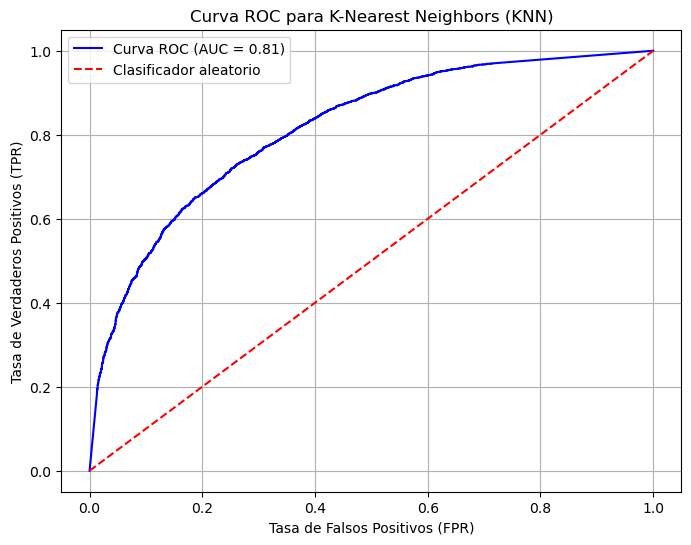

In [47]:
# Es para el número de núcleos que usará porque sino tira warning en el conteo de nucleos que usa uno de los procesos

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  

knn = KNeighborsClassifier()

# b. la grilla de hiperparámetros de KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15],  # El valor de K
    'weights': ['uniform', 'distance'], # Cómo pesan los vecinos
    'metric': ['euclidean', 'manhattan'] # Tipo de distancia
}

# c. Configurar la búsqueda en grilla
# Usamos n_jobs=-1 para que use todos los procesadores (más rápido)
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# d. Ejecutar la búsqueda (¡Usando los datos escalados!)
print("Iniciando búsqueda de hiperparámetros para KNN...")
grid_search_knn.fit(X_train_scaled, y_train)

# --- 2. MOSTRAR MEJORES RESULTADOS ---
print("Búsqueda finalizada.")
print(f"Mejores parámetros para KNN: {grid_search_knn.best_params_}")
print(f"Mejor score (accuracy) en CV: {grid_search_knn.best_score_:.4f}")

# --- 3. OBTENER PREDICCIONES Y GRAFICAR ROC ---

# a. Obtener el mejor modelo (ya entrenado)
best_model = grid_search_knn.best_estimator_

# b. Obtiene las probabilidades sobre el set de PRUEBA (escalado)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# c. Calcula el score AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC (KNN) en Test: {auc_score:.4f}")

# d. Calcula los puntos de la curva (FPR, TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# e. Grafico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para K-Nearest Neighbors (KNN)')
plt.legend()
plt.grid()
plt.show()

In [48]:
#LogisticRegression(solver='liblinear', max_iter=1000)

model = LogisticRegression(max_iter=3000)  # o más si sigue sin converger

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# 5. Realizar Predicciones
# Usamos el modelo entrenado para predecir los resultados en el conjunto de prueba
y_pred = model.predict(X_test)

# 6. Evaluar el Modelo
# Comparamos las predicciones (y_pred) con los valores reales (y_test)

# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
print("-" * 30)

# Matriz de Confusión
# Muestra cuántos clasificó bien y cuántos mal
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("-" * 30)

Exactitud del modelo: 81.33%
------------------------------
Matriz de Confusión:
[[4032  177]
 [1232 2104]]
------------------------------


C:\Users\rodol\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
log_reg = LogisticRegression(solver='liblinear') 

# 2. Define la grilla de hiperparámetros
# Queremos probar todos estos valores de C combinados con ambas penalizaciones
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Lista de valores de C a probar
    'penalty': ['l1', 'l2']         # Lista de penalizaciones a probar
}

# 3. Configura la búsqueda en grilla
# cv=5 significa que usará validación cruzada de 5 folds
# scoring='accuracy' (o 'roc_auc', etc.) le dice qué métrica optimizar
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# 4. Ejecuta la búsqueda
# Esto entrenará todos los modelos para cada combinación
grid_search.fit(X_train, y_train)

# 5. Muestra los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# 6. Muestra el mejor score
print(f"Mejor score (accuracy): {grid_search.best_score_}")

Mejores parámetros: {'C': 1, 'penalty': 'l1'}
Mejor score (accuracy): 0.8115658000051639


Score AUC: 0.8596


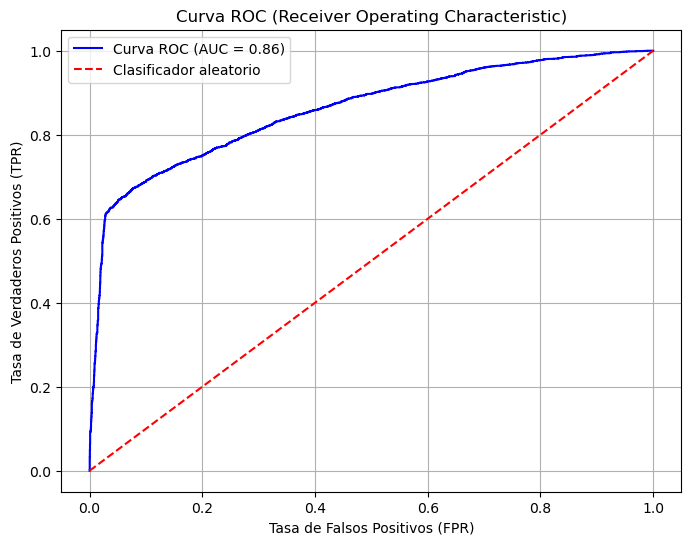

In [50]:

best_model = grid_search.best_estimator_

# b. Obtener las PROBABILIDADES de predicción sobre el set de PRUEBA
# .predict_proba() devuelve 2 columnas (prob de clase 0, prob de clase 1)
# Necesitamos la probabilidad de la clase positiva [:, 1]
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# --- 4. CALCULAR Y GRAFICAR LA CURVA ROC (Paso nuevo) 📈 ---

# a. Calcular el score AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC: {auc_score:.4f}")

# b. Calcular los puntos de la curva (FPR, TPR)
# fpr = False Positive Rate (Tasa de Falsos Positivos)
# tpr = True Positive Rate (Tasa de Verdaderos Positivos)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# c. Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio') # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.grid()
plt.show()

In [51]:
#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP_FINAL'

# Asi se llamara el excel
archivo_nombre = "y_test.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
y_test.to_excel(destino, index=False)

In [52]:
#Random forest

In [53]:
import math

num_columnas = X_train.shape[1]
m_sugerido = math.sqrt(num_columnas)
print(round(m_sugerido,0))

13.0


In [60]:
# max_features: es el subconjunto de predictores m (en slides) a considerar. El default es  max_features=1

regressor = RandomForestClassifier(n_estimators=173,  max_features=13, random_state=1) 
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)

mse_test_rf1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE testeo (m=35):', round(mse_test_rf1, 2))


MSE testeo (m=35): 0.18


In [61]:
regressor2 = RandomForestClassifier(n_estimators=173, max_features=50, random_state=1) 
regressor2.fit(X_train, y_train) 

y_pred2 = regressor2.predict(X_test)

mse_test_rf2 = metrics.mean_squared_error(y_test, y_pred2)
print('MSE testeo (m=50):', round(mse_test_rf2, 2))

MSE testeo (m=50): 0.17


In [62]:
regressor3 = RandomForestClassifier(n_estimators=173, max_features=100, random_state=1) 
regressor3.fit(X_train, y_train) 

y_pred3 = regressor3.predict(X_test)

mse_test_rf3 = metrics.mean_squared_error(y_test, y_pred3)
print('MSE testeo (m=100):', round(mse_test_rf3, 2))


MSE testeo (m=100): 0.17


In [57]:
# Set simple de Ranfom Forest
rf_model = RandomForestClassifier(max_samples=200, random_state=1) 

# Cantidad de predictures posibles a usar 
max_attributes = X_train.shape[1]
m_range = range(1, max_attributes + 1)
rf_para = {'max_features':m_range}

# Estimacion para la grilla de parametro de tunning
grid_search = GridSearchCV(rf_model, rf_para, cv=10, scoring='neg_median_absolute_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_samples=200, random_state=1),
             param_grid={'max_features': range(1, 173)},
             scoring='neg_median_absolute_error')

In [63]:
# Extraemos el mejor modelo
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
best_rf


#Evaluacion de Random Forest con m features elegido por cross-validation
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
print('MSE test:', round(mse_rf, 2))

MSE test: 0.14


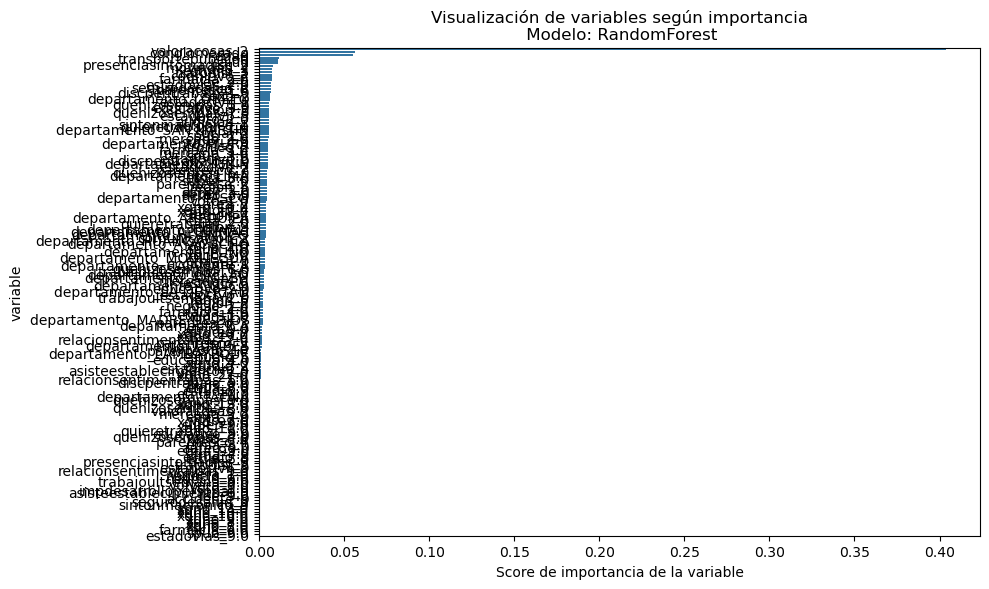

In [64]:
feature_imprf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imprf, y=feature_imprf.index)
plt.xlabel('Score de importancia de la variable')
plt.ylabel('variable')
plt.title("Visualización de variables según importancia\n Modelo: RandomForest")
plt.tight_layout()